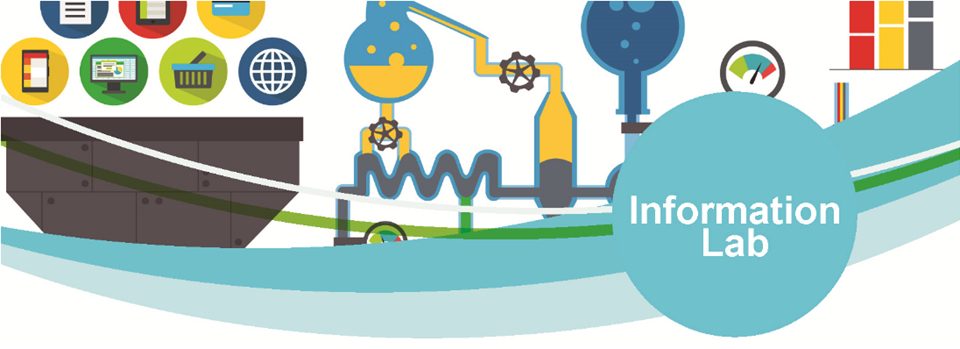


<h1>Python Plots - __Groups__</h1>

Examples of graphs used for _Groups_ using the MatplotLib and Seaborn Python Packages.

Prepared by: Anthony Vidler <br>

Source Material: <br>
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

Data Dictionaries: <br>
https://ggplot2.tidyverse.org/reference/mpg.html<br>
https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/USArrests.html<br>

In [12]:
# Setup - Limited parts needed per plot.

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import sklearn
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.0.2
0.9.0


To run the code below you will need to map //finbilab01/COP_Repo to a lettered drive (I have used E:) as shown in the images below or alternatively download the data to your local drive and repoint the code to find them.

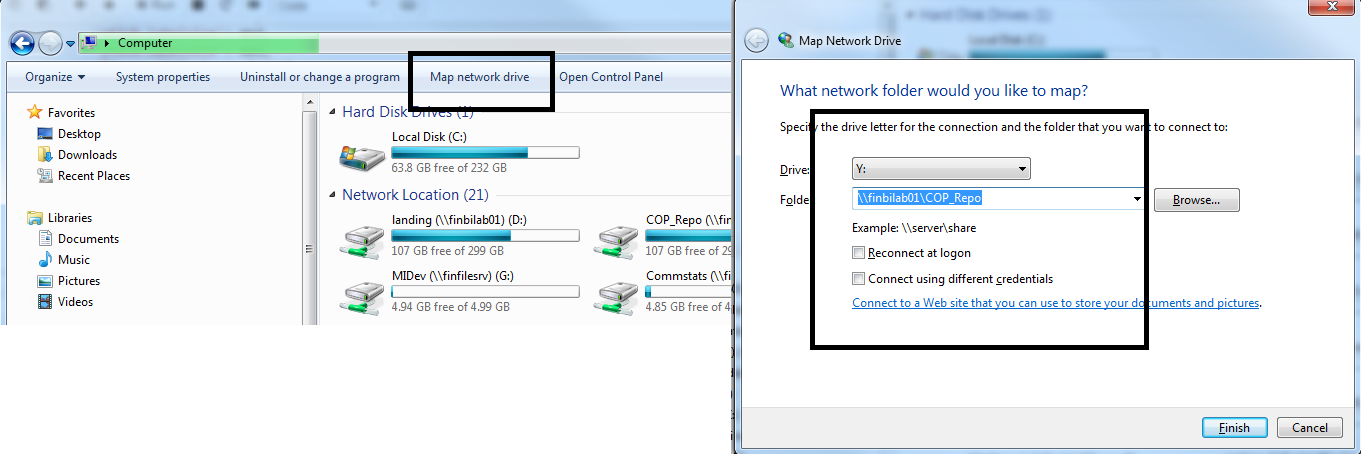

In [13]:
# Import Global Datasets - Dataset is stored in //finbilab01/COP_Repo/Code_Cache/Python/Datasets

df = pd.read_csv("J:/Code_Cache/Python/Datasets/USArrests.csv")
mt = pd.read_csv("J:/Code_Cache/Python/Datasets/mtcars.csv")
df_final = pd.read_csv("J:/Code_Cache/Python/Datasets/diamonds_filter.csv")


In [14]:
# Check that the 'US Arrest' data has loaded correctly
df.head(20)

,Murder,Assault,UrbanPop,Rape,State
0,13.2,236,58,21.2,Alabama
1,10.0,263,48,44.5,Alaska
2,8.1,294,80,31.0,Arizona
3,8.8,190,50,19.5,Arkansas
4,9.0,276,91,40.6,California
5,7.9,204,78,38.7,Colorado
6,3.3,110,77,11.1,Connecticut
7,5.9,238,72,15.8,Delaware
8,15.4,335,80,31.9,Florida
9,17.4,211,60,25.8,Georgia


In [15]:
# Check that the 'mt car' data has loaded correctly
mt.head(10)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,carname
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout,Hornet Sportabout
5,4.254409,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1,Valiant,Valiant
6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,Duster 360
7,4.939636,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1,Merc 240D,Merc 240D
8,4.774935,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1,Merc 230,Merc 230
9,4.381780,6,167.6,123,3.92,3.440,18.30,1,0,4,4,1,Merc 280,Merc 280


In [16]:
# Check that the 'diamonds filter' data has loaded correctly
df_final.head(10)

,carat,depth,table,clarity,cut
0,0.73,64.6,60.0,4.0,Fair
1,0.73,66.9,54.0,0.0,Fair
2,0.50,66.5,58.0,4.0,Fair
3,0.70,64.5,57.0,4.0,Fair
4,1.01,65.3,59.0,2.0,Fair
5,0.70,64.9,59.0,0.0,Fair
6,0.70,64.3,62.0,0.0,Fair
7,1.00,64.8,59.0,2.0,Fair
8,0.58,65.8,56.0,0.0,Fair
9,0.90,64.6,58.0,4.0,Fair


<h2>1. Dendrogram

A _Dendrogram_ groups similar points together based on a given distance metric and organizes them in tree like links based on the point’s similarity.

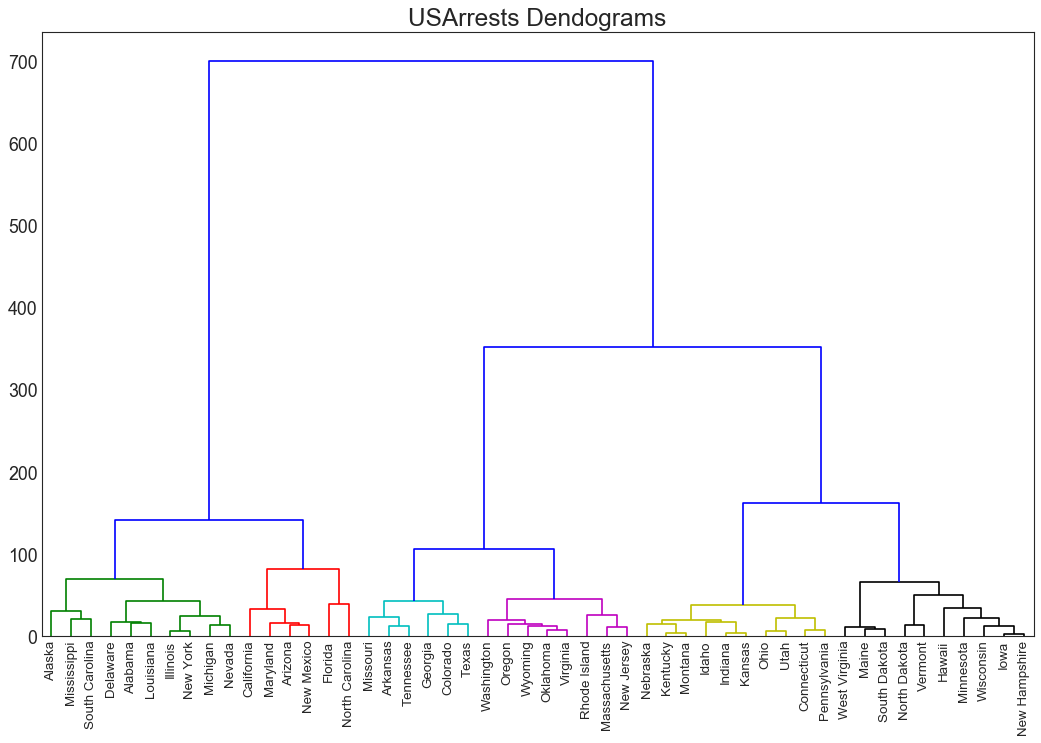

In [17]:
# Plot
plt.figure(figsize=(16, 10), dpi= 80)  
plt.title("USArrests Dendograms", fontsize=22)  
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward'), labels=df.State.values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show() 

<h2>2. Cluster Plot

Cluster Plot canbe used to demarcate points that belong to the same cluster. Below is a representational example to group the US states into 5 groups based on the USArrests dataset. This cluster plot uses the ‘murder’ and ‘assault’ columns as X and Y axis. Alternately you can use the first to principal components as the X and Y axis.

In [18]:
# Import plot specific packages

from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

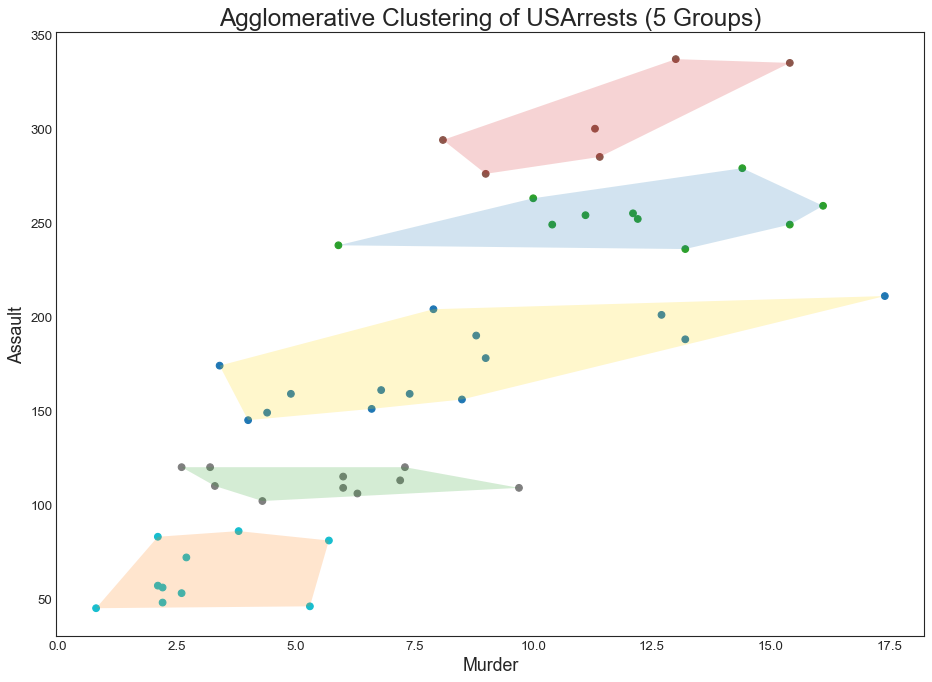

In [19]:
# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])  

# Plot
plt.figure(figsize=(14, 10), dpi= 80)  
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='tab10')  

# Encircle
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Draw polygon surrounding vertices    
encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc="tab:orange", alpha=0.2, linewidth=0)

# Decorations
plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)
plt.show()

<h2>3. Andrews Curve

__Andrews Curve__ helps visualize if there are inherent groupings of the numerical features based on a given grouping. If the features (columns in the dataset) doesn’t help discriminate the group (cyl), then the lines will not be well segregated as you see below.

In [20]:
# Import plot specific packages

from pandas.plotting import andrews_curves

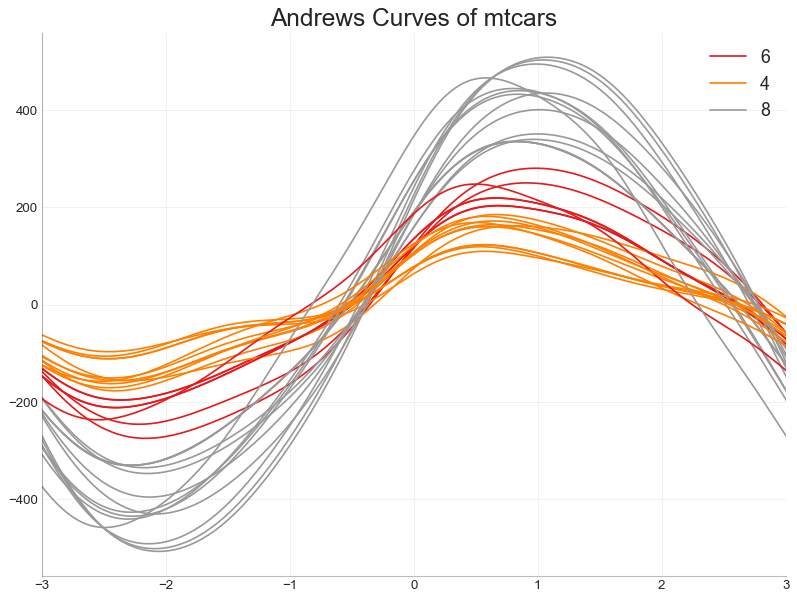

In [21]:
# Transform imported data

# Transform imported data
mt.drop(['cars', 'carname'], axis=1, inplace=True)

# Plot
plt.figure(figsize=(12,9), dpi= 80)
andrews_curves(mt, 'cyl', colormap='Set1')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=22)
plt.xlim(-3,3)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


<h2>4. Parallel Coordinates

__Parallel coordinates__ helps to visualize if a feature helps to segregate the groups effectively. If a segregation is effected, that feature is likely going to be very useful in predicting that group.

In [22]:
# Import plot specific packages

from pandas.plotting import parallel_coordinates

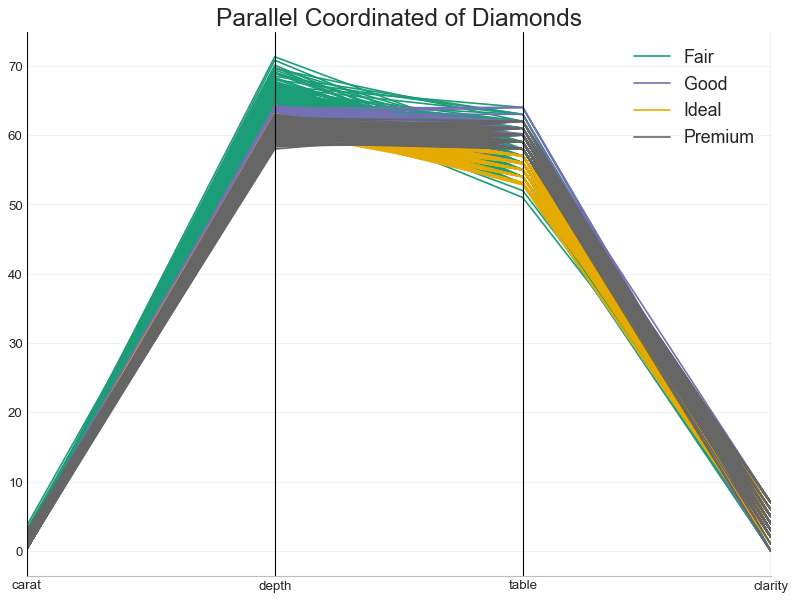

In [23]:
# Plot
plt.figure(figsize=(12,9), dpi= 80)
parallel_coordinates(df_final, 'cut', colormap='Dark2')

# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Parallel Coordinated of Diamonds', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()